In [12]:
import torch
import sys
import os.path as osp
import os
import sys
import numpy as np
from src.dataset.dataset import SimpleIterDataset, EventDataset, EventDatasetCollection
from src.utils.utils import to_filelist
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rc('font', size=13)
from src.plotting.plot_event import plot_event_comparison
from src.dataset.functions_data import concat_events
from src.utils.paths import get_path
from dotenv import load_dotenv
load_dotenv()

True

In [13]:

def remove_from_list(lst):
    out = []
    for item in lst:
        if item in ["hgcal", "data.txt", "test_file.root"]:
            continue
        out.append(item)
    return out

#path = "/eos/user/g/gkrzmanc/jetclustering/data/SVJ_std_UL2018_scouting_test_large/SVJ_mMed-700GeV_mDark-20GeV_rinv-0.7_alpha-peak"
def get_iter(path_to_ds):
    return iter(EventDatasetCollection(path_to_ds, args=None))

inputs = {
    "Delphes": ["Delphes_020425_test/SVJ_mZprime-900_mDark-20_rinv-0.3_alpha-peak"],
    "CMS FullSim": ["Feb26_2025_E1000_N500_noPartonFilter_GluonFix_FullF_part0/PFNano_s-channel_mMed-900_mDark-20_rinv-0.3_alpha-peak_13TeV-pythia8_n-1000",
                    "Feb26_2025_E1000_N500_noPartonFilter_GluonFix_FullF_part1/PFNano_s-channel_mMed-900_mDark-20_rinv-0.3_alpha-peak_13TeV-pythia8_n-1000",
                    "Feb26_2025_E1000_N500_noPartonFilter_GluonFix_FullF_part2/PFNano_s-channel_mMed-900_mDark-20_rinv-0.3_alpha-peak_13TeV-pythia8_n-1000",
                    "Feb26_2025_E1000_N500_noPartonFilter_GluonFix_FullF_part3/PFNano_s-channel_mMed-900_mDark-20_rinv-0.3_alpha-peak_13TeV-pythia8_n-1000",
                    "Feb26_2025_E1000_N500_noPartonFilter_GluonFix_FullF_part4/PFNano_s-channel_mMed-900_mDark-20_rinv-0.3_alpha-peak_13TeV-pythia8_n-1000"]
}


In [14]:
datasets = {
    key: get_iter([get_path(x, "preprocessed_data") for x in value]) for key, value in inputs.items()
}

Getting query for path Delphes_020425_test/SVJ_mZprime-900_mDark-20_rinv-0.3_alpha-peak  | Preproc. data root= /work/gkrzmanc/jetclustering/preprocessed_data
get_pfcands_key
Getting query for path Feb26_2025_E1000_N500_noPartonFilter_GluonFix_FullF_part0/PFNano_s-channel_mMed-900_mDark-20_rinv-0.3_alpha-peak_13TeV-pythia8_n-1000  | Preproc. data root= /work/gkrzmanc/jetclustering/preprocessed_data
Getting query for path Feb26_2025_E1000_N500_noPartonFilter_GluonFix_FullF_part1/PFNano_s-channel_mMed-900_mDark-20_rinv-0.3_alpha-peak_13TeV-pythia8_n-1000  | Preproc. data root= /work/gkrzmanc/jetclustering/preprocessed_data
Getting query for path Feb26_2025_E1000_N500_noPartonFilter_GluonFix_FullF_part2/PFNano_s-channel_mMed-900_mDark-20_rinv-0.3_alpha-peak_13TeV-pythia8_n-1000  | Preproc. data root= /work/gkrzmanc/jetclustering/preprocessed_data
Getting query for path Feb26_2025_E1000_N500_noPartonFilter_GluonFix_FullF_part3/PFNano_s-channel_mMed-900_mDark-20_rinv-0.3_alpha-peak_13TeV-pyt

In [17]:
e.final_parton_level_particles.pid

tensor([21., 21., 21., 21., 21., 21., -4.,  4., 21., 21., 21., 21., 21., 21.,
        21.,  4., 21., 21., 21., 21., 21., 21., 21., 21., 21.,  4., -4., 21.,
        21., 21., 21., 21., 21., 21., 21.,  4., -3.,  3., 21., 21., 21., 21.,
        21., 21., 21., 21., 21., 21., 21., 21., 21., 21.,  4., -5.,  5., 21.,
        21.,  5., -5.], dtype=torch.float64)

In [15]:
e = next(datasets["Delphes"])

In [62]:
pid_masses = {}
for i in range(100):
    e = next(datasets["CMS FullSim"])
    for i in range(len(e.pfcands)):
        pid = e.pfcands.pid[i].item()
        if pid not in pid_masses:
            pid_masses[pid] = []
        pid_masses[pid].append(e.pfcands.mass[i].item())

In [11]:
e = next(datasets["CMS FullSim"])

StopIteration: 

In [64]:
pid_masses[211]

[0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.13956999778747559,
 0.1395699

In [6]:
from tqdm import tqdm
def get_stats(ds):
    result = {
        "n_pfcands": [],
        "pfcands_pt": [],
        "pfcands_eta": [],
        "pfcands_phi": [],
        "pfcands_pid": [],
        "pfcands_mass": [],
        "n_genp": [],
        "n_parton_level": [],
        "genp_pt": [],
        "parton_level_pt": []
    }
    for _ in tqdm(range(10000)):
        event = next(ds)
        result["n_pfcands"].append(len(event.pfcands))
        result["pfcands_pt"] += event.pfcands.pt.tolist()
        result["pfcands_eta"] += event.pfcands.eta.tolist()
        result["pfcands_phi"] += event.pfcands.phi.tolist()
        result["pfcands_pid"] += event.pfcands.pid.tolist()
        result["pfcands_mass"] += event.pfcands.mass.tolist()
        result["n_genp"].append(len(event.final_gen_particles))
        result["n_parton_level"].append(len(event.final_parton_level_particles))
        result["genp_pt"] += event.final_gen_particles.pt.tolist()
        result["parton_level_pt"] += event.final_parton_level_particles.pt.tolist()
    return result

In [7]:
results = {
    key: get_stats(value) for key, value in datasets.items()
}

100%|██████████| 10000/10000 [00:32<00:00, 303.67it/s]


In [67]:
import pandas as pd
for key in results:
    print("#######", key, "#######")
    pids = results[key]["pfcands_pid"]
    print(pd.Series(pids).value_counts(normalize=True))

####### Delphes #######
211.0     0.562422
22.0      0.301421
2112.0    0.136157
Name: proportion, dtype: float64
####### CMS FullSim #######
 22.0     0.370183
 130.0    0.259895
 211.0    0.180796
-211.0    0.180127
 2.0      0.002972
 1.0      0.001564
 0.0      0.001398
-13.0     0.000861
 13.0     0.000815
 11.0     0.000723
-11.0     0.000667
Name: proportion, dtype: float64


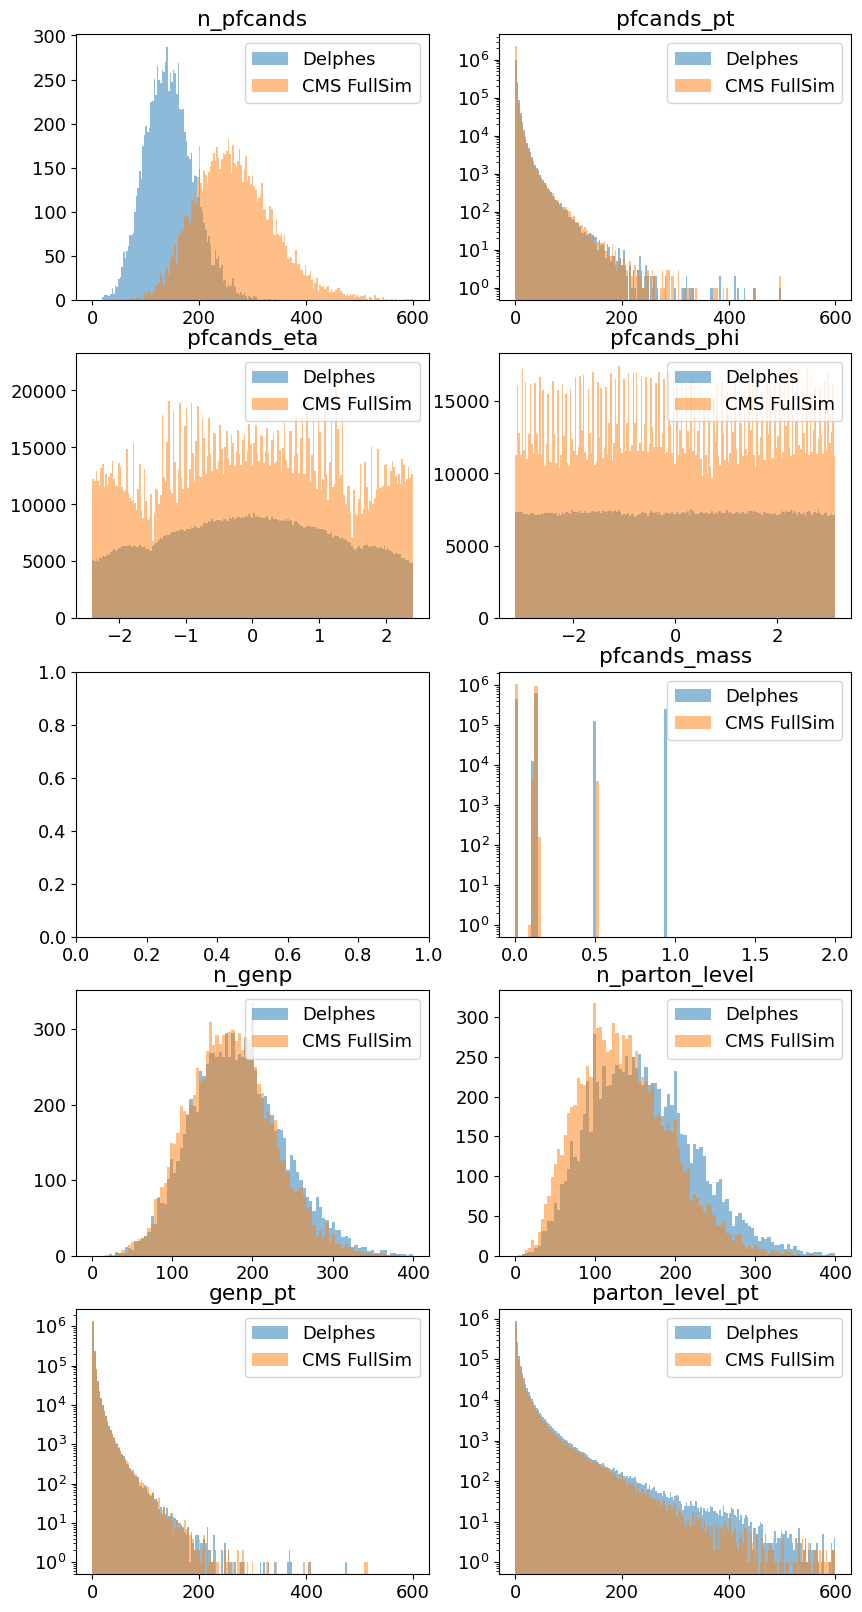

In [8]:
bins = {
    "n_pfcands": np.linspace(0, 600, 200),
    "pfcands_pt": np.linspace(0, 600, 200),
    "pfcands_eta": np.linspace(-2.4, 2.4, 200),
    "pfcands_phi": np.linspace(-3.14, 3.14, 200),
    "pfcands_mass": np.linspace(0, 2, 100),
    "n_genp": np.linspace(0,400,100),
    "n_parton_level": np.linspace(0,400,100),
    "genp_pt": np.linspace(0, 600, 200),
    "parton_level_pt": np.linspace(0, 600, 200),
}
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
for key in results:
    for i, (k, v) in enumerate(results[key].items()):
        if k == "pfcands_pid":
            continue
        ax[i // 2, i % 2].hist(v, bins=bins[k], alpha=0.5, label=key)
        ax[i // 2, i % 2].set_title(k)
        if k == "pfcands_pt" or "mass" in k or "_pt" in k:
            ax[i//2, i%2].set_yscale("log")
            #ax[i//2, i%2].set_xscale("log")
        ax[i // 2, i % 2].legend()
fig.show()
